## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

In [3]:
PATH = 'data/planet/'

In [4]:
ls {PATH}

test-jpg/  train-jpg/  train_v2.csv


## Multi-label versus single-label classification

In [5]:
from fastai.plots import *

In [6]:
def get_1st(path): return glob(f'{path}/*.*')[0]

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

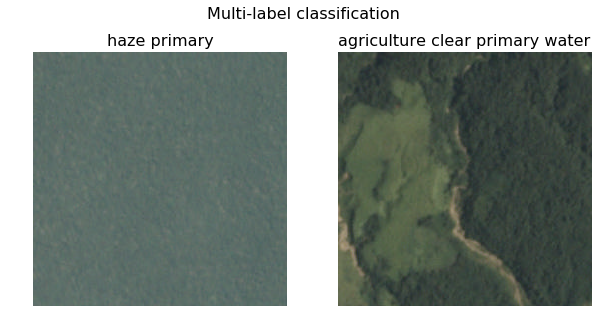

In [7]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In multi-label classification each sample can belong to one or more clases. In the previous example, the first images belongs to two clases: *haze* and *primary*. The second image belongs to four clases: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [8]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [9]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [10]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [12]:
sz=64

In [13]:
data = get_data(sz)

In [14]:
data = data.resize(int(sz*1.3), 'tmp')

A Jupyter Widget

In [15]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

In [16]:
lr = 0.2

In [17]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.14759  0.13119  0.8873 ]                        
[ 1.       0.14465  0.12504  0.8932 ]                        
[ 2.       0.13885  0.12389  0.89386]                        
[ 3.       0.13851  0.12356  0.89543]                        
[ 4.       0.13201  0.12144  0.8973 ]                        
[ 5.       0.13221  0.11986  0.89839]                        
[ 6.       0.13285  0.11959  0.89851]                        



In [18]:
lrs = np.array([lr/9,lr/3,lr])

In [19]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.11985  0.10733  0.90943]                        
[ 1.       0.11714  0.10185  0.9148 ]                        
[ 2.       0.1098   0.0986   0.91807]                        
[ 3.       0.11069  0.09983  0.9168 ]                        
[ 4.       0.1069   0.09695  0.91911]                        
[ 5.       0.10179  0.09455  0.92136]                         
[ 6.       0.10035  0.09368  0.92236]                         



In [20]:
learn.save(f'{sz}')

In [21]:
learn.load(f'{sz}')

In [22]:
# try preds with sz=64
preds = learn.TTA(is_test = True)

RuntimeError: received 0 items of ancdata